<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
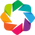

In [1]:
import Ballpushing_utils
from Ballpushing_utils import *
from Utils import *
import pickle

import importlib

import holoviews as hv
hv.extension('bokeh')

In [2]:
TestFly = Fly(Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230721_Feedingstate_4_PM_Videos_Tracked/arena5/corridor3/"))

In [ ]:
TestFly.flyball_positions

In [ ]:
TestFly

In [ ]:
print(TestFly)

In [ ]:
TestFly.display_metadata()

In [ ]:
TestFly.arena_metadata()

In [ ]:
help(Fly.find_interaction_events)

In [ ]:
TestFly.directory

In [ ]:
TestFly.name

In [ ]:
TestFly.arena_metadata

In [ ]:
TestFly.directory

In [ ]:
TestFly.video

In [ ]:
TestFly_Interactions = TestFly.find_interaction_events()

In [ ]:
TestFly_Interactions

In [ ]:
TestFly_Interactions_old = TestFly.find_interaction_events(gap_between_events=1, event_min_length=60, thresh=[0,80])

In [ ]:
len(TestFly_Interactions)

In [ ]:
len(TestFly_Interactions_old)

In [ ]:
TestExp = Experiment(Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230721_Feedingstate_4_PM_Videos_Tracked/"))

In [ ]:
TestExp

In [ ]:
print(TestExp)

In [ ]:
TestExp.flies

In [ ]:
Fly1 = TestExp.flies[0]

In [ ]:
Fly1.name

# Testing the video preview

In [ ]:
TestFly.video

In [ ]:
# Only use with save=Flase if you're working on your machine and not using ssh

TestFly.generate_preview(save=True, preview= True, tracks=True)

In [ ]:
print(TestFly.experiment.fps)

In [ ]:
import moviepy
help(moviepy.editor.VideoFileClip.fx)

In [ ]:
NewTest = Fly(get_labserver() / "Experimental_data/MultiMazeRecorder/Videos" / "231121_TNT_Fine_1_Videos_Tracked/arena1/corridor1/")

In [ ]:
NewTest.display_metadata()

In [ ]:
NewTest.generate_preview(save=True)

# Generate interaction events video

In [3]:
TestFly.generate_interactions_video()

Finished processing 230721_Feedingstate_4_PM_Videos_Tracked_arena5_corridor3_PR!


# Datasets

## Dataset with a list of experiments:

In [ ]:
brain_regions_path

In [ ]:
pd.read_csv(brain_regions_path)


In [ ]:
pd.read_csv("/mnt/labserver/DURRIEU_Matthias/Experimental_data/Region_map_231215.csv")

In [ ]:
Exps = [Experiment(Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230721_Feedingstate_4_PM_Videos_Tracked/")),
        Experiment(Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/231121_TNT_Fine_1_Videos_Tracked/"))]

In [ ]:
Exps[1].load_metadata()

In [ ]:
filtered = filter_experiments(Exps, Genotype="TNTxG78")

len(filtered)

In [ ]:
Data = Ballpushing_utils.Dataset(Exps)

In [ ]:
Data

In [ ]:
print(Data)

In [ ]:
Data.data

In [ ]:
Data.data["event"]

In [ ]:
Data.flies

In [ ]:
importlib.reload(Ballpushing_utils)

In [ ]:
Data.plot_events(show=True, save=True)

## Dataset with a list of flies

In [ ]:
FlyList = [Fly(Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230721_Feedingstate_4_PM_Videos_Tracked/arena5/corridor3/")),
           Fly(Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/231121_TNT_Fine_1_Videos_Tracked/arena1/corridor1/"))]

In [ ]:
FlyList

In [ ]:
Data = Dataset(FlyList)

In [ ]:
print(Data)

In [ ]:
Data.data

In [ ]:
# Check the unique values of the column fly and experiment
Data.data.fly.unique()

Data.data.experiment.unique()

In [ ]:
Dpath = get_data_path()

In [ ]:
Dpath = get_data_path()

# Get all folders that have TNT and Fine in their name

Folders = [f for f in Dpath.iterdir() if "TNT" in f.name and "Fine" in f.name]

Folders

# Make them into Experiments

Exps = [Experiment(f) for f in Folders]

In [ ]:
Data = Dataset(Exps)

print(Data)

In [ ]:
Data.flies

In [ ]:
Data.experiments

## Dataset with one experiment

In [ ]:
data = Dataset(Experiment(Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230721_Feedingstate_4_PM_Videos_Tracked/")))

In [ ]:
data.flies

In [ ]:
data.experiments

## Data with one fly

In [ ]:
data = Dataset(Fly(Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230721_Feedingstate_4_PM_Videos_Tracked/arena5/corridor3/")))

In [ ]:
data

In [ ]:
print(data)

In [ ]:
data.flies

In [ ]:
data.experiments

In [ ]:
data = Dataset (int(2))

# Testing get_folders method

In [ ]:
Exps = get_folders (get_data_path(), ["TNT", "Fine"])

Exps

# Testing the filter_experiments

In [ ]:
Filtered_flies = filter_experiments([Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/231121_TNT_Fine_1_Videos_Tracked/")], {"Genotype" : "PR"})

In [ ]:
len(Filtered_flies)

# Dataset and plotting

In [ ]:
Folders = get_folders(get_data_path(), ["TNT", "Fine"])

Exps = [Experiment(f) for f in Folders]

In [ ]:
# Save the experiments in a pickle file
with open ("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Datasets/240122_TNT_Fine_1_Experiments.pkl", "wb") as f:
    pickle.dump(Exps, f)

In [ ]:
# Load the experiments from the pickle file
Exps = load_object("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Datasets/240122_TNT_Fine_1_Experiments.pkl")

In [ ]:
Data = Dataset(Exps)

print(Data)

In [ ]:
Data

# Testing labelling

In [ ]:
def plot_events(data, plot_options=hv_main, show=True, save=False, outpath=None):
    """Generate a plot of the number of events per Genotype and Fly, grouped by Simplified region.

    Args:
        plot_options (dict, optional): A dictionary containing the plot options. Defaults to MD's main holoviews styling options.
        show (bool, optional): Whether to display the plot or not. Defaults to True.
    """
    # Check that events have been annotated
    if "event" not in data.data.columns:
        raise ValueError(
            "No events have been annotated. Run the annotate_events method first."
        )

    # Group the data by Fly and Event
    GroupedData = (
        data.data.groupby(["fly", "Nickname", "Simplified region"])
        .nunique(["event"])
        .reset_index()
    )

    # Calculate sample size
    SampleSize = (
        data.data.groupby(["Nickname", "Simplified region"])
        .nunique()["fly"]
        .reset_index()
        .rename(columns={"fly": "SampleSize"})
    )

    # Merge GroupedData and SampleSize
    GroupedData = pd.merge(
        GroupedData, SampleSize, on=["Nickname", "Simplified region"]
    )

    # Modify Nickname column
    GroupedData["Nickname"] = (
        GroupedData["Nickname"] + " (n = " + GroupedData["SampleSize"].astype(str) + ")"
    )

    h_NumbEvents_bp = (
        hv.BoxWhisker(
            data=GroupedData,
            vdims="event",
            kdims=["Nickname", "Simplified region"],
            color="Nickname",
        )
        .groupby("Simplified region")
        .opts(**plot_options["boxwhisker"])
    )

    h_NumbEvents_sc = (
        hv.Scatter(
            data=GroupedData,
            vdims="event",
            kdims=["Nickname", "Simplified region"],
            color="Nickname",
        )
        .groupby("Simplified region")
        .opts(**plot_options["scatter"])
    )

    hvplot_NumbEvents = (h_NumbEvents_bp * h_NumbEvents_sc).opts(**plot_options["plot"])

    if show:
        hv.render(hvplot_NumbEvents)
    if save:
        if outpath is None:
            now = datetime.datetime.now()  # get current date and time
            date_time = now.strftime("%Y%m%d_%H%M")  # format as a string

            output_path = (
                get_labserver()
                / "Experimental_data"
                / "MultiMazeRecorder"
                / f"EventsNumber_{date_time}.html"
            )

        hv.save(hvplot_NumbEvents, output_path)

    return hvplot_NumbEvents


plot_events(Data, show=True, save=False)

# Testing more generic function with better tooltips

In [ ]:
data = Dataset(
    Experiment(
        Path(
            "/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/231121_TNT_Fine_1_Videos_Tracked/"
        )
    )
)

In [ ]:
print(data)

In [ ]:
data.experiments[0].metadata

In [ ]:
coords = data.generate_dataset()

In [ ]:
coords

In [ ]:
data.generate_dataset("summary")

In [ ]:
summaries

# BS CI

In [ ]:
Test_ctrl = ['TNTxG78', 'TNTxG75', 'TNTxG79']

In [ ]:
data.compute_bs_ci("SignificantEvents", Test_ctrl)

In [ ]:
bs = data.compute_bs_ci("SignificantEvents", Test_ctrl)

In [ ]:
bs

In [ ]:
# Get unique 'Brain region' values from your data
label = data.data["label"]
brain_regions = data.data["Brain region"]

# Create a DataFrame from bs_ci that gets the label and brain region from the main dataset and the lower and upper bounds from bs_ci

bs_ci_df = pd.DataFrame(
    {
        "label": label,
        "Brain region": brain_regions,
        "lower": np.repeat(bs[0], len(label)),
        "upper": np.repeat(bs[1], len(label)),
    }
)

In [ ]:
bs_ci_df

In [ ]:
data.jitter_boxplot(data.data, "SignificantEvents")

In [ ]:
data

In [ ]:
fly1 = data._prepare_dataset_summary_metrics(data.flies[0])

In [ ]:
fly1.reset_index().head()

In [ ]:
fly1["Nickname"]

In [ ]:
data.flies[0].get_events_number()

In [ ]:
events = data.get_event_numbers()

In [ ]:
data.jitter_boxplot(events, "event")

In [ ]:
finalevents = data.get_final_events()

In [ ]:
data.jitter_boxplot(finalevents, "FinalEvent")

# New Fly centered methods

## Final event

In [ ]:
TestFly = Fly(
    Path(
        "/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230721_Feedingstate_4_PM_Videos_Tracked/arena5/corridor3/"
    )
)

In [ ]:
TestFly.dead_or_empty

In [ ]:
TestFly.get_events_number()

In [ ]:
TestFly.interaction_events

In [ ]:
TestFly.get_final_event()

In [ ]:
sig = TestFly.get_significant_events()

In [ ]:
sig

In [ ]:
TestFly.find_breaks()

In [ ]:
len(TestFly.find_breaks())

In [ ]:
TestFly.find_pulling_events()

In [ ]:
len(TestFly.find_pulling_events())

In [ ]:
TestFly.generate_clip(event=1)

# Testing the controls CI generation

In [ ]:
# Get a list of experiments that have, TNT, Fine, and 2401 in their name
Exps = get_folders(get_data_path(), ["TNT", "Fine", "2401"])

Exps

In [ ]:
# Generate a dataset from the experiments
Data = Dataset([Experiment(e) for e in Exps])

In [ ]:
summaries = Data.generate_dataset("summary")

# JitterBoxplot + CI

In [2]:
data = Dataset(
    [
        Experiment(
            Path(
                "/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/231121_TNT_Fine_1_Videos_Tracked/"
            )
        ),
        Experiment(
            Path(
                "/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/231121_TNT_Fine_2_Videos_Tracked/"
            )
        ),
    ]
)

data.generate_dataset("summary")

No final event found for 231121_TNT_Fine_1_Videos_Tracked_arena5_corridor2
No final event found for 231121_TNT_Fine_1_Videos_Tracked_arena8_corridor6
No final event found for 231121_TNT_Fine_2_Videos_Tracked_arena2_corridor2
   NumberEvents  FinalEvent  FinalTime  SignificantEvents  SignificantFirst  \
0            51          11       1172                  3                 1   

   SignificantFirstTime  CumulatedBreaks  Pushes  Pulls  \
0                  1900            82251       3      0   

                                                 fly  \
0  231121_TNT_Fine_1_Videos_Tracked_arena2_corridor5   

                         experiment      Nickname Brain region    Date  \
0  231121_TNT_Fine_1_Videos_Tracked  KC-α/βc-GaL4           MB  231121   

  Genotype Period     FeedingState Orientation Light Crossing  
0  TNTxG78   PM14  starved_noWater         std    on        1  
   NumberEvents  FinalEvent  FinalTime  SignificantEvents  SignificantFirst  \
0            40          26 

,NumberEvents,FinalEvent,FinalTime,SignificantEvents,SignificantFirst,SignificantFirstTime,CumulatedBreaks,Pushes,Pulls,fly,...,Brain region,Date,Genotype,Period,FeedingState,Orientation,Light,Crossing,SampleSize,label
0,51,11,1172,3,1,1900,82251,3,0,231121_TNT_Fine_1_Videos_Tracked_arena2_corridor5,...,MB,231121,TNTxG78,PM14,starved_noWater,std,on,1,6,KC-α/βc-GaL4 (n = 6)
1,40,26,528,3,7,31848,93738,3,0,231121_TNT_Fine_1_Videos_Tracked_arena2_corridor1,...,MB,231121,TNTxG78,PM14,starved_noWater,std,on,1,6,KC-α/βc-GaL4 (n = 6)
2,58,9,693,8,1,1772,81705,8,0,231121_TNT_Fine_1_Videos_Tracked_arena2_corridor4,...,MB,231121,TNTxG78,PM14,starved_noWater,std,on,1,6,KC-α/βc-GaL4 (n = 6)
3,33,3,1706,4,0,898,91863,4,0,231121_TNT_Fine_1_Videos_Tracked_arena2_corridor2,...,MB,231121,TNTxG78,PM14,starved_noWater,std,on,1,6,KC-α/βc-GaL4 (n = 6)
4,82,1,1678,2,0,1742,53049,2,0,231121_TNT_Fine_1_Videos_Tracked_arena2_corridor6,...,MB,231121,TNTxG78,PM14,starved_noWater,std,on,1,6,KC-α/βc-GaL4 (n = 6)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,34,14,632,9,1,24464,95979,7,2,231121_TNT_Fine_2_Videos_Tracked_arena9_corridor1,...,fchON,231121,TNTxG54,PM15,starved_noWater,std,on,1,6,GMR86D09-GAL4 (n = 6)
104,18,4,371,3,0,45325,99891,3,0,231121_TNT_Fine_2_Videos_Tracked_arena9_corridor4,...,fchON,231121,TNTxG54,PM15,starved_noWater,std,on,1,6,GMR86D09-GAL4 (n = 6)
105,8,0,131,0,None,None,103036,0,0,231121_TNT_Fine_2_Videos_Tracked_arena9_corridor2,...,fchON,231121,TNTxG54,PM15,starved_noWater,std,on,1,6,GMR86D09-GAL4 (n = 6)
106,63,16,881,3,4,11152,91174,2,1,231121_TNT_Fine_2_Videos_Tracked_arena9_corridor6,...,fchON,231121,TNTxG54,PM15,starved_noWater,std,on,1,6,GMR86D09-GAL4 (n = 6)


In [8]:
mydata = data.data

In [3]:
data.jitter_boxplot(data.data, "SignificantEvents")

No flies with control genotypes found in the dataset.
No control data to generate the confidence interval.


:HoloMap   [Brain region]
   :Overlay
      .BoxWhisker.I :BoxWhisker   [label]   (SignificantEvents)
      .Scatter.I    :Scatter   [label]   (SignificantEvents,Date,Genotype,Period,FeedingState,Orientation,Light,Crossing,fly)

In [ ]:
data.data

In [ ]:
def jitter_boxplot(
    dataset, data, vdim, plot_options=hv_main, show=True, save=False, outpath=None
):
    # Get the metadata for the tooltips
    tooltips = [
        ("Fly", "@fly"),
        (vdim.capitalize(), f"@{vdim}"),
    ]

    # Add the metadata to the tooltips
    for var in dataset.metadata:
        tooltips.append((var.capitalize(), f"@{var}"))

    hover = HoverTool(tooltips=tooltips)

    # Compute the bootstrap confidence interval for the metric
    bs_ci = dataset.compute_bs_ci(vdim, ["TNTxG78", "TNTxG75", "TNTxG79"])

    y_min = data[vdim].min()
    y_max = data[vdim].max()

    hv_boxplot = (
        hv.BoxWhisker(
            data=data,
            vdims=vdim,
            kdims=["label", "Brain region"],
        )
        .groupby(["Brain region"])
        .opts(
            box_fill_color=None,
            box_line_color="black",
            outlier_fill_color=None,
            outlier_line_color=None,
            framewise=True,
        )
    )
    hv_boxplot.opts(ylim=(y_min, y_max))

    hv_scatterplot = (
        hv.Scatter(
            data=data,
            vdims=[vdim] + dataset.metadata + ["fly"],
            kdims=["label", "Brain region"],
        )
        .groupby("Brain region")
        .opts(jitter=0.3,
        color="label",
        alpha=0.5,
        size=6,
        cmap="Category10",
        framewise=True, tools=[hover])
    )
    hv_scatterplot.opts(ylim=(y_min, y_max))

    # Create an Area plot for the confidence interval
    hv_bs_ci = hv.HSpan(bs_ci[0], bs_ci[1]).opts(fill_alpha=0.2, color="red")

    hv_jitter_boxplot = (hv_boxplot * hv_scatterplot * hv_bs_ci).opts(
        **plot_options["plot"]
    )

    if show:
        hv.render(hv_jitter_boxplot)
    if save:
        if outpath is None:
            now = datetime.datetime.now()  # get current date and time
            date_time = now.strftime("%Y%m%d_%H%M")  # format as a string

            output_path = (
                get_labserver()
                / "Experimental_data"
                / "MultiMazeRecorder"
                / "Plots"
                / f"{vdim}Number_{date_time}.html"
            )

        hv.save(hv_jitter_boxplot, output_path)

    return hv_jitter_boxplot

In [ ]:
plot = jitter_boxplot(data, data.data, "NumberEvents", show=True, save=True)

plot

In [ ]:
# Assuming 'df' is your DataFrame and 'grouped' is the grouped data
grouped = data.data.groupby("Brain region")

# To inspect a particular group, say 'Group_Name'
#specific_group = grouped.get_group("Group_Name")

# Now 'specific_group' is a DataFrame that contains only the data for 'Group_Name'
#print(specific_group)

In [ ]:
for name, group in grouped:
    print(f"Group: {name}")
    print(group)

In [ ]:
print(grouped.groups)

In [ ]:
grouped.get_group("MB")

# Fixing the metrics not plotting correctly

In [5]:
data.jitter_boxplot(data.data, "FinalTime")

No flies with control genotypes found in the dataset.
No control data to generate the confidence interval.


:HoloMap   [Brain region]
   :Overlay
      .BoxWhisker.I :BoxWhisker   [label]   (FinalTime)
      .Scatter.I    :Scatter   [label]   (FinalTime,Date,Genotype,Period,FeedingState,Orientation,Light,Crossing,fly)